In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Overview

In [3]:
crop = pd.read_csv('Crop Production data.csv')

In [4]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
crop.shape

(246091, 7)

In [8]:
crop.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

### Feature Engineering

In [9]:
crop=crop.dropna(subset=['Production'],axis=0)

In [10]:
crop.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [12]:
#Removing trailing spaces
crop['Crop'] = crop['Crop'].str.strip()

In [13]:
crop['Season'] = crop['Season'].str.strip()

In [14]:
#Unique crop seasons
crop['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

## Exploratory Data Analysis

- State with largest overall crop production?

In [15]:
a= crop.groupby('State_Name')['Production'].sum().nlargest(10).reset_index()
a

,State_Name,Production
0,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
2,Tamil Nadu,1.207644e+10
3,Uttar Pradesh,3.234493e+09
4,Assam,2.111752e+09
5,West Bengal,1.397904e+09
6,Maharashtra,1.263641e+09
7,Karnataka,8.634298e+08
8,Andaman and Nicobar Islands,7.182232e+08
9,Punjab,5.863850e+08


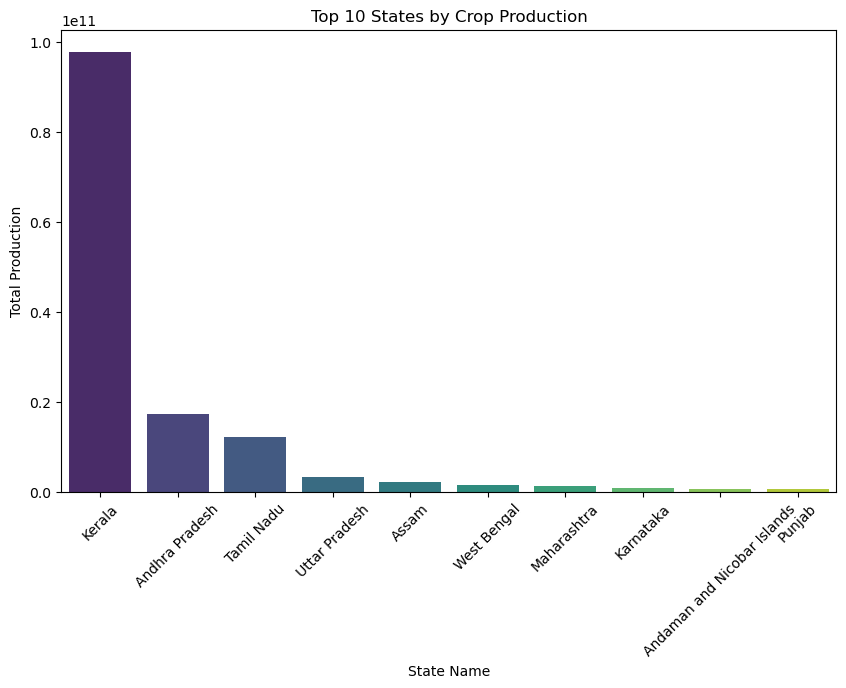

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=a, x='State_Name', y='Production', palette='viridis')
plt.xlabel('State Name')
plt.ylabel('Total Production')
plt.title('Top 10 States by Crop Production')
plt.xticks(rotation=45)
plt.show()

- Which crop contributes the most production?

In [17]:
kerala_df = crop[crop['State_Name'] == 'Kerala'].reset_index()

In [18]:
kerala_df.groupby('Crop')['Production'].sum().nlargest(5).reset_index()

,Crop,Production
0,Coconut,9.780304e+10
1,Tapioca,4.611366e+07
2,Rice,1.059335e+07
3,Banana,7.655662e+06
4,Sugarcane,3.819916e+06


### Understanding Kharif Crops

In [23]:
kharif_df= crop[crop['Season']=='Kharif']

In [24]:
#Top 5 kharif crops
top5_kharif_crops = kharif_df.groupby('Crop')['Production'].sum().nlargest(5).reset_index()
top5_kharif_crops

,Crop,Production
0,Sugarcane,1.774444e+09
1,Rice,9.416566e+08
2,Cotton(lint),2.816592e+08
3,Maize,1.965474e+08
4,Jute,1.810813e+08


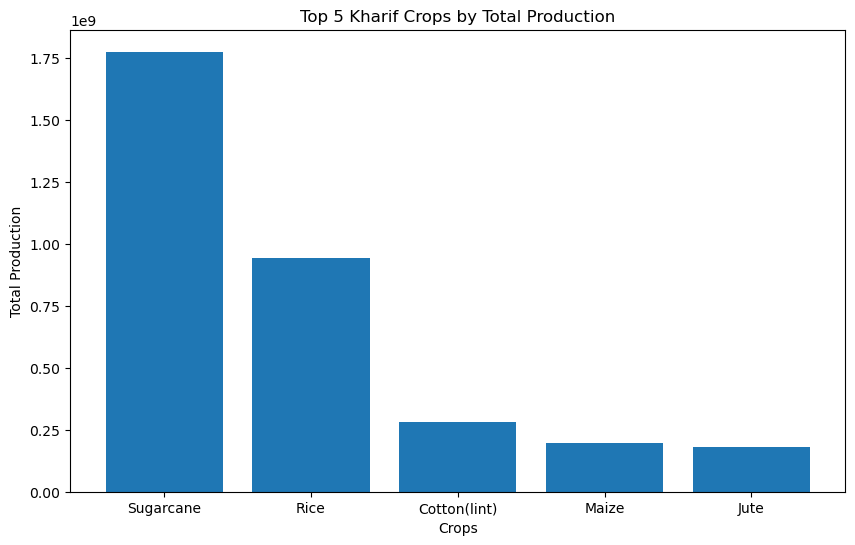

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(top5_kharif_crops['Crop'], top5_kharif_crops['Production'])
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.title('Top 5 Kharif Crops by Total Production')
plt.show()

In [26]:
#States with highest kharif production
top5_kharif_states = kharif_df.groupby('State_Name')['Production'].sum().nlargest(5).reset_index()
top5_kharif_states

,State_Name,Production
0,Uttar Pradesh,1.721678e+09
1,Maharashtra,5.364638e+08
2,Punjab,2.170368e+08
3,Andhra Pradesh,2.003361e+08
4,Gujarat,1.763154e+08


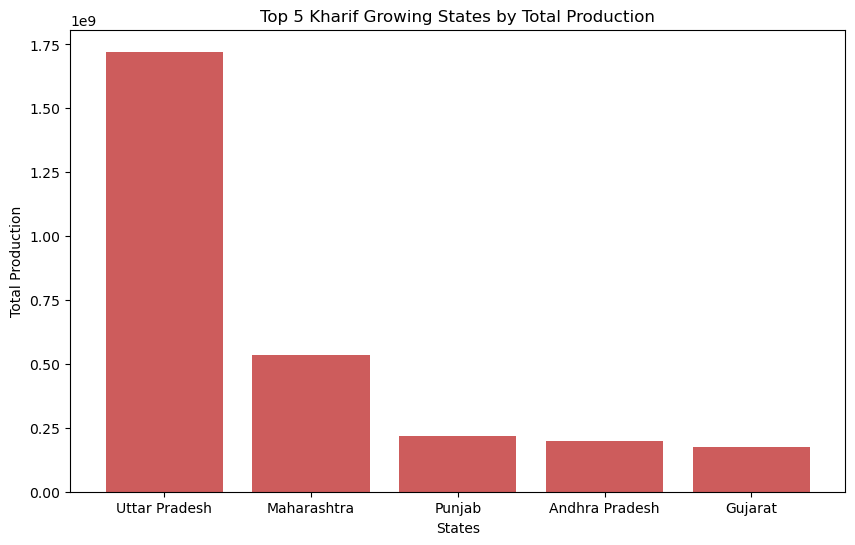

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(top5_kharif_states['State_Name'], top5_kharif_states['Production'], color= 'indianred')
plt.xlabel('States')
plt.ylabel('Total Production')
plt.title('Top 5 Kharif Growing States by Total Production')
plt.show()

In [28]:
#District with highest kharif crop production
district_prod_kharif = kharif_df.groupby(['Crop','District_Name'])['Production'].sum().reset_index()
district_prod_sorted = district_prod_kharif.sort_values(by=['Crop', 'Production'], ascending=[True, False])
top_districts = district_prod_sorted.drop_duplicates(subset=['Crop'], keep='first')
top_districts.sort_values(by='Production',ascending=False).head()

,Crop,District_Name,Production
9440,Sugarcane,MUZAFFARNAGAR,159132372.0
3891,Jute,MURSHIDABAD,37082245.0
7624,Rice,SANGRUR,24448000.0
1814,Cotton(lint),RAJKOT,13951800.0
2783,Groundnut,JUNAGADH,9997700.0


In [29]:
#Trend of top 5 kharif crops over time
top_5_crop_names = top5_kharif_crops['Crop'].tolist()
top_5_kharif_crop_data = kharif_df[kharif_df['Crop'].isin(top_5_crop_names)]

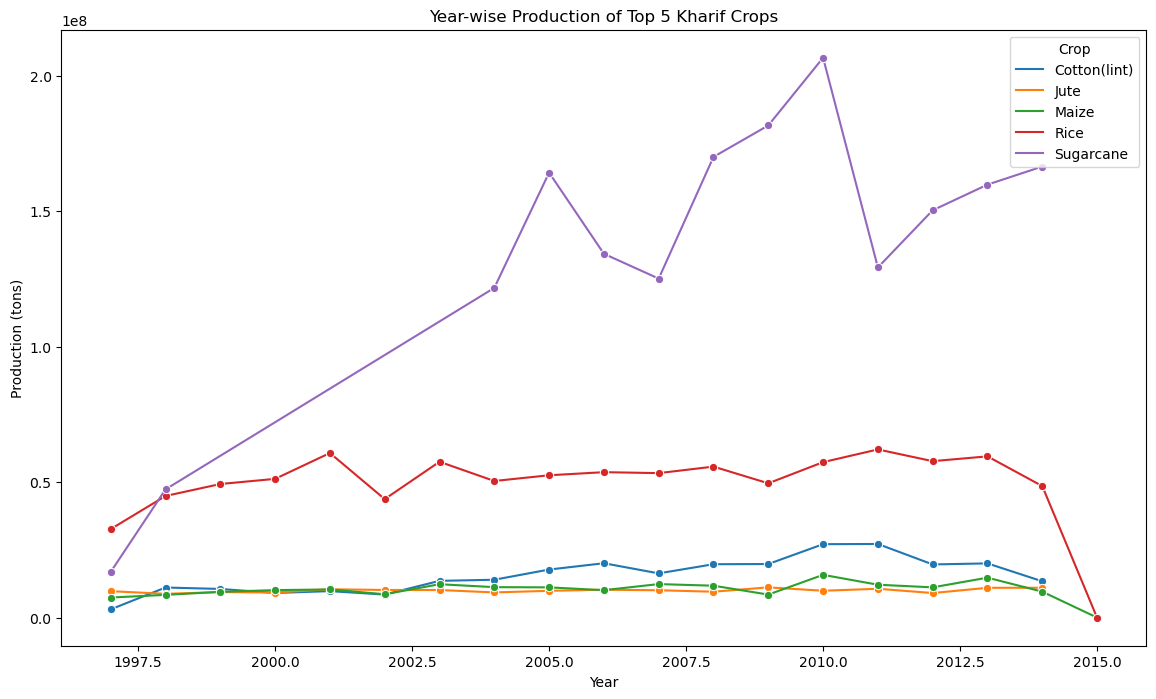

In [30]:
year_wise_dist_kharif = top_5_kharif_crop_data.groupby(['Crop','Crop_Year'])['Production'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=year_wise_dist_kharif, x='Crop_Year', y='Production', hue='Crop', marker='o')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('Year-wise Production of Top 5 Kharif Crops')
plt.show()

In [31]:
#Kharif crops production area
high_kharif_area = kharif_df.groupby('Crop')['Area'].sum().nlargest(5).reset_index()
high_kharif_area

,Crop,Area
0,Rice,4.200772e+08
1,Cotton(lint),1.470048e+08
2,Bajra,1.368716e+08
3,Soyabean,1.276648e+08
4,Maize,9.895388e+07


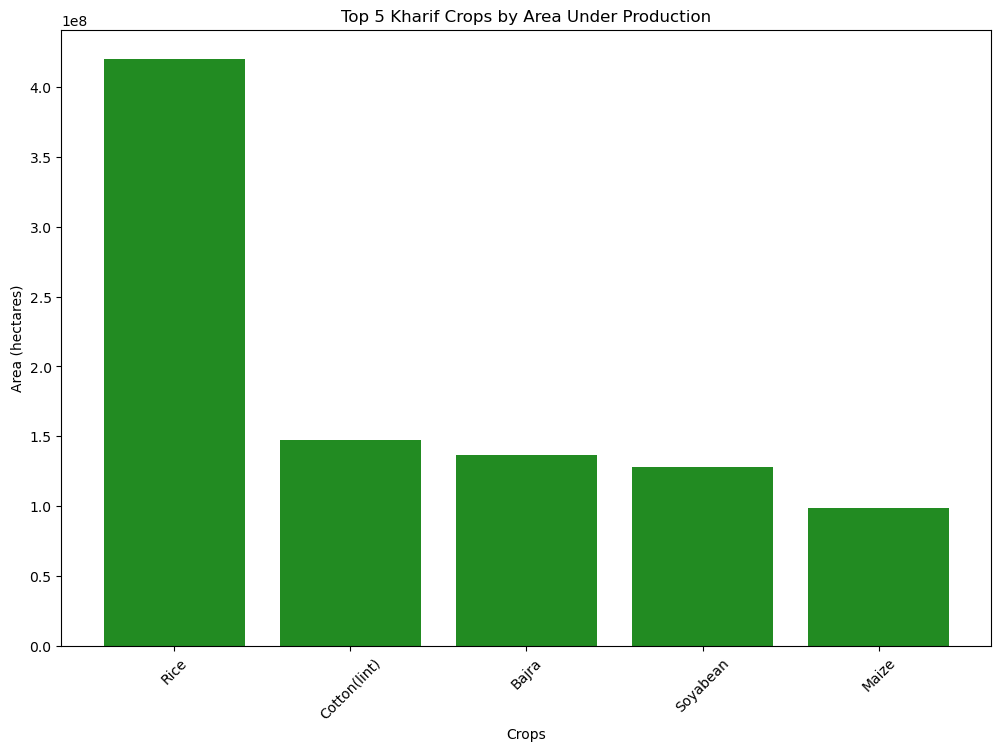

In [32]:
plt.figure(figsize=(12, 8))
plt.bar(high_kharif_area['Crop'], high_kharif_area['Area'], color='forestgreen')
plt.xlabel('Crops')
plt.ylabel('Area (hectares)')
plt.title('Top 5 Kharif Crops by Area Under Production')
plt.xticks(rotation=45)
plt.show()

### Understanding Rabi Crops

In [33]:
rabi_df = crop[crop['Season']=='Rabi']

In [34]:
#Top 5 rabi crops
top5_rabi_crops = rabi_df.groupby('Crop')['Production'].sum().nlargest(5).reset_index()
top5_rabi_crops

,Crop,Production
0,Wheat,1.323890e+09
1,Potato,2.051821e+08
2,Gram,9.574061e+07
3,Rapeseed &Mustard,8.976733e+07
4,Rice,8.412133e+07


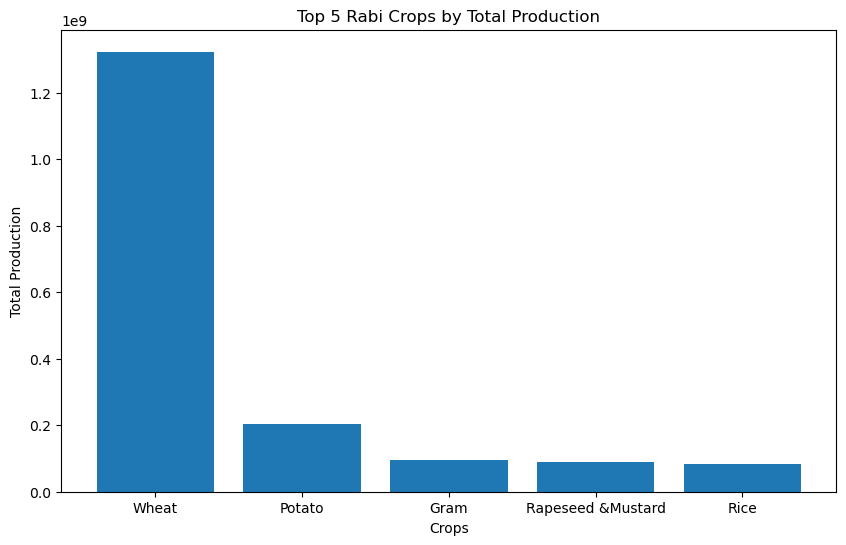

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(top5_rabi_crops['Crop'], top5_rabi_crops['Production'])
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.title('Top 5 Rabi Crops by Total Production')
plt.show()

In [37]:
#States with highest rabi crops production
top5_rabi_states = rabi_df.groupby('State_Name')['Production'].sum().nlargest(5).reset_index()
top5_rabi_states

,State_Name,Production
0,Uttar Pradesh,6.479436e+08
1,Punjab,2.794604e+08
2,Madhya Pradesh,1.916485e+08
3,Haryana,1.732721e+08
4,Rajasthan,1.549330e+08


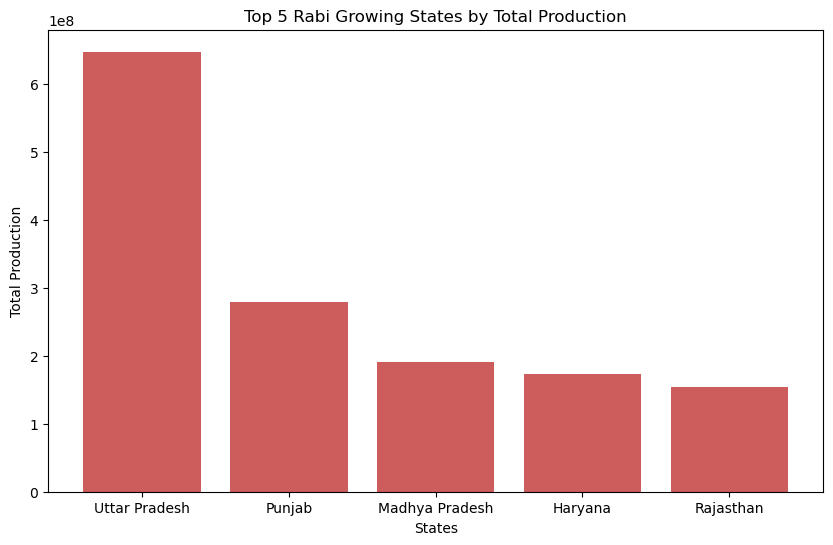

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(top5_rabi_states['State_Name'], top5_rabi_states['Production'], color= 'indianred')
plt.xlabel('States')
plt.ylabel('Total Production')
plt.title('Top 5 Rabi Growing States by Total Production')
plt.show()

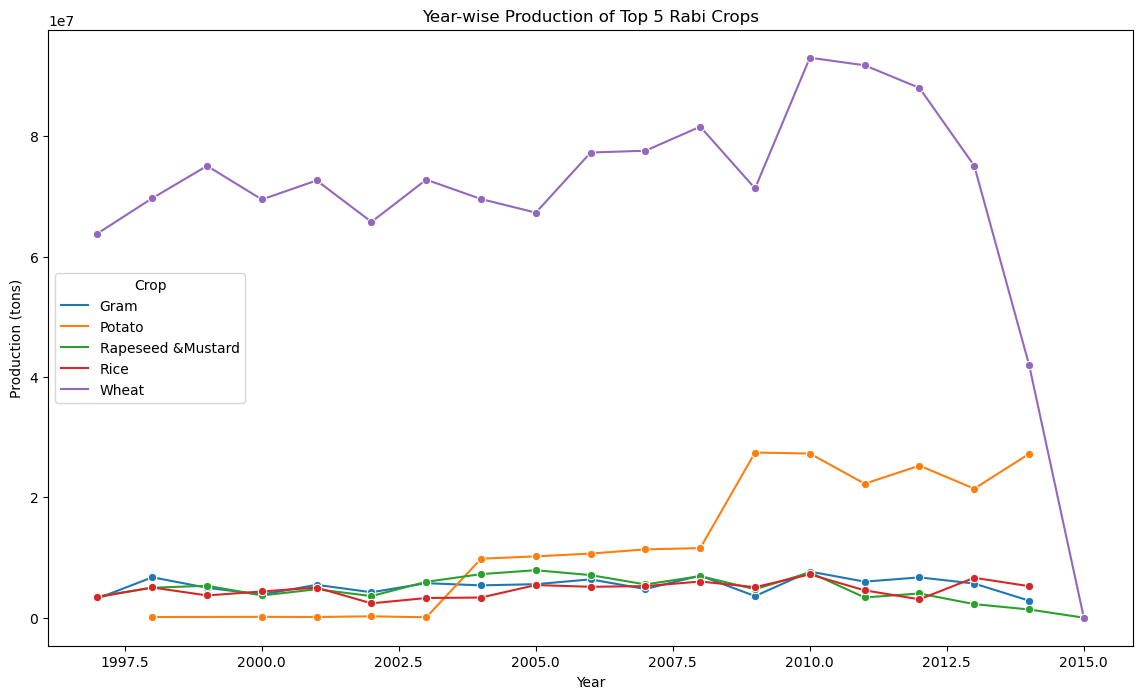

In [39]:
#Trend of top 5 rabi crops over time
top_5_crop_names = top5_rabi_crops['Crop'].tolist()
top_5_rabi_crop_data = rabi_df[rabi_df['Crop'].isin(top_5_crop_names)]
year_wise_dist_rabi = top_5_rabi_crop_data.groupby(['Crop','Crop_Year'])['Production'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=year_wise_dist_rabi, x='Crop_Year', y='Production', hue='Crop', marker='o')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('Year-wise Production of Top 5 Rabi Crops')
plt.show()

In [40]:
#District with highest rabi crops production
district_prod_rabi = rabi_df.groupby(['Crop','District_Name'])['Production'].sum().reset_index()
district_prod_sorted = district_prod_rabi.sort_values(by=['Crop', 'Production'], ascending=[True, False])
top_districts = district_prod_sorted.drop_duplicates(subset=['Crop'], keep='first')
top_districts.sort_values(by='Production',ascending=False).head()

,Crop,District_Name,Production
7567,Wheat,FIROZEPUR,28037000.0
5133,Potato,HOOGHLY,18235040.0
6093,Rice,WEST GODAVARI,14091503.0
3807,Oilseeds total,NADIA,7556300.0
2847,Maize,GUNTUR,6520429.0


In [41]:
#Rabi crops production area
high_rabi_area = rabi_df.groupby('Crop')['Area'].sum().nlargest(5).reset_index()
high_rabi_area

,Crop,Area
0,Wheat,4.662077e+08
1,Gram,1.141078e+08
2,Rapeseed &Mustard,8.526505e+07
3,Jowar,7.572938e+07
4,Oilseeds total,5.084325e+07


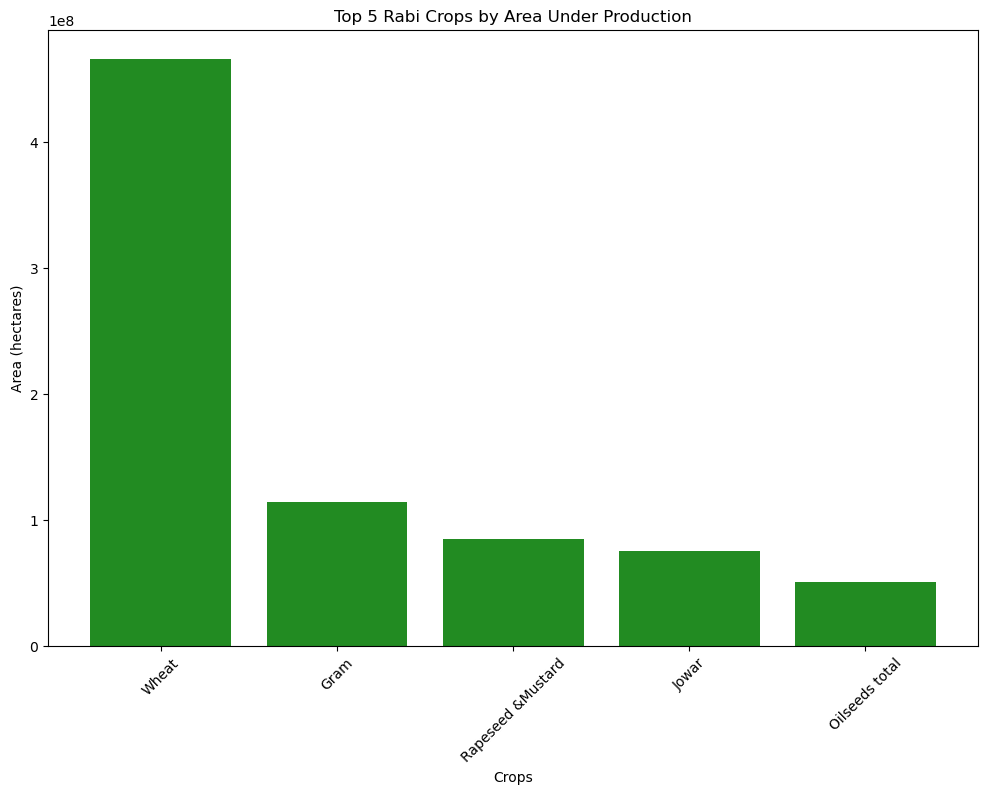

In [42]:
plt.figure(figsize=(12, 8))
plt.bar(high_rabi_area['Crop'], high_rabi_area['Area'], color='forestgreen')
plt.xlabel('Crops')
plt.ylabel('Area (hectares)')
plt.title('Top 5 Rabi Crops by Area Under Production')
plt.xticks(rotation=45)
plt.show()

### Understanding crops which takes whole year to grow

In [43]:
#Top 5 crops
wholeyear_df = crop[crop['Season']=='Whole Year']
top5_wholeyear_crops = wholeyear_df.groupby('Crop')['Production'].sum().nlargest(5).reset_index()
top5_wholeyear_crops

,Crop,Production
0,Coconut,1.299815e+11
1,Sugarcane,3.745173e+09
2,Potato,1.985014e+08
3,Banana,1.406728e+08
4,Tapioca,1.039236e+08


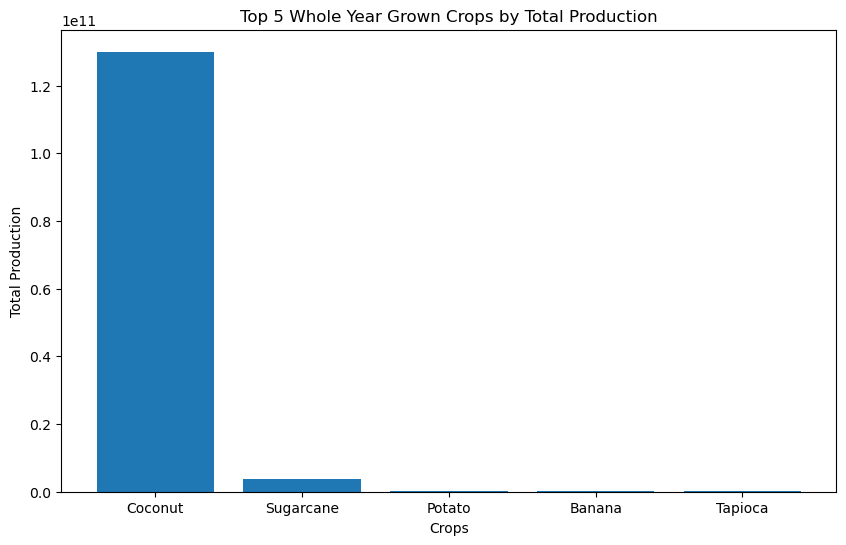

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(top5_wholeyear_crops['Crop'], top5_wholeyear_crops['Production'])
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.title('Top 5 Whole Year Grown Crops by Total Production')
plt.show()

In [47]:
#States with highest production
top5_wholeyear_states = wholeyear_df.groupby('State_Name')['Production'].sum().nlargest(5).reset_index()
top5_wholeyear_states

,State_Name,Production
0,Kerala,9.786933e+10
1,Andhra Pradesh,1.702610e+10
2,Tamil Nadu,1.194169e+10
3,Assam,1.996667e+09
4,Uttar Pradesh,8.608339e+08


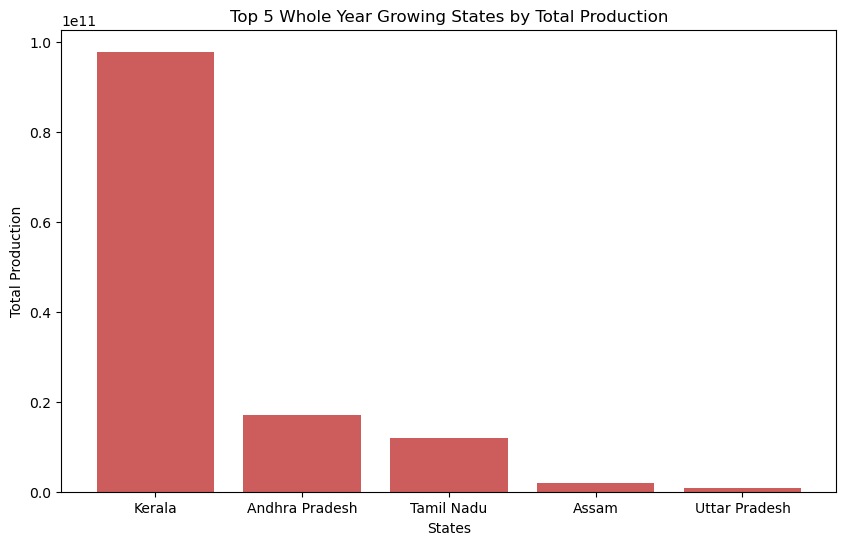

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(top5_wholeyear_states['State_Name'], top5_wholeyear_states['Production'], color= 'indianred')
plt.xlabel('States')
plt.ylabel('Total Production')
plt.title('Top 5 Whole Year Growing States by Total Production')
plt.show()

In [49]:
#District with highest production
district_prod_wholeyear = wholeyear_df.groupby(['Crop','District_Name'])['Production'].sum().reset_index()
district_prod_sorted = district_prod_wholeyear.sort_values(by=['Crop', 'Production'], ascending=[True, False])
top_districts = district_prod_sorted.drop_duplicates(subset=['Crop'], keep='first')
top_districts.sort_values(by='Production',ascending=False).head()

,Crop,District_Name,Production
1951,Coconut,KOZHIKODE,1.527871e+10
8163,Sugarcane,BELGAUM,1.982076e+08
6708,Potato,HOOGHLY,1.884138e+07
9209,Tapioca,NAMAKKAL,1.177835e+07
658,Banana,TUTICORIN,8.058815e+06


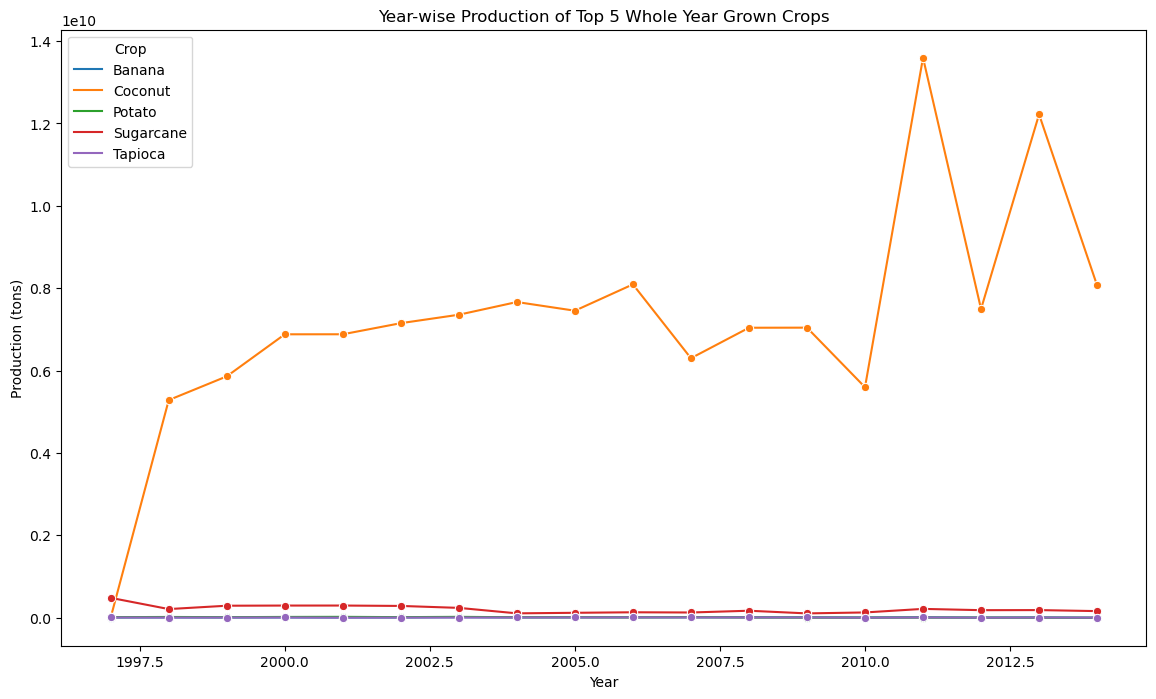

In [50]:
#Trend of crops over time
top_5_crop_names = top5_wholeyear_crops['Crop'].tolist()
top_5_wholeyear_crop_data = wholeyear_df[wholeyear_df['Crop'].isin(top_5_crop_names)]
year_wise_dist_wholeyear = top_5_wholeyear_crop_data.groupby(['Crop','Crop_Year'])['Production'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=year_wise_dist_wholeyear, x='Crop_Year', y='Production', hue='Crop', marker='o')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('Year-wise Production of Top 5 Whole Year Grown Crops')
plt.show()

In [51]:
#Area coverage
high_wholeyear_area = wholeyear_df.groupby('Crop')['Area'].sum().nlargest(5).reset_index()
high_wholeyear_area

,Crop,Area
0,Sugarcane,48118891.52
1,Guar seed,31093921.00
2,Coconut,28334575.32
3,Pulses total,21636852.00
4,Potato,12137156.00


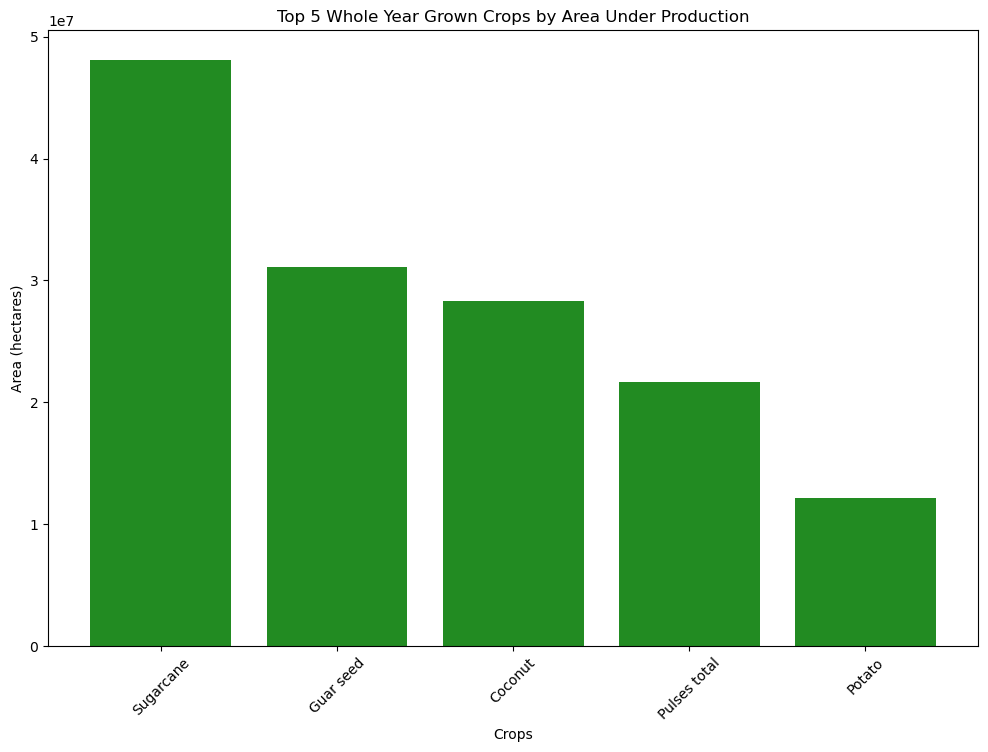

In [52]:
plt.figure(figsize=(12, 8))
plt.bar(high_wholeyear_area['Crop'], high_wholeyear_area['Area'], color='forestgreen')
plt.xlabel('Crops')
plt.ylabel('Area (hectares)')
plt.title('Top 5 Whole Year Grown Crops by Area Under Production')
plt.xticks(rotation=45)
plt.show()

### Rice Production

In [151]:
rice_dist = crop[crop['Crop']=='Rice']
rice_dist_df = rice_dist.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head()
rice_dist_df

,District_Name,Production
0,BARDHAMAN,34239976.0
1,MEDINIPUR WEST,29192719.0
2,WEST GODAVARI,27845309.0
3,EAST GODAVARI,24690929.0
4,SANGRUR,24448000.0


### Wheat Production

In [152]:
wheat_dist = crop[crop['Crop']=='Wheat']
wheat_dist_df = wheat_dist.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head()
wheat_dist_df

,District_Name,Production
0,FIROZEPUR,28037000.0
1,SANGRUR,27948000.0
2,LUDHIANA,22779000.0
3,PATIALA,21325000.0
4,AMRITSAR,20989000.0


### Sugarcane Production

In [153]:
sugarcane_dist = crop[crop['Crop']=='Sugarcane']
sugarcane_dist_df = sugarcane_dist.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head()
sugarcane_dist_df

,District_Name,Production
0,MUZAFFARNAGAR,258698795.0
1,BIJNOR,230907185.0
2,KHERI,224383685.0
3,BELGAUM,198207649.0
4,KOLHAPUR,157210426.0


### Coconut Production

In [158]:
coconut_dist = crop[crop['Crop']=='Coconut']
coconut_dist_df = coconut_dist.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head()
coconut_dist_df

,District_Name,Production
0,KOZHIKODE,1.527871e+10
1,MALAPPURAM,1.451252e+10
2,THIRUVANANTHAPURAM,1.001337e+10
3,THRISSUR,9.920739e+09
4,KANNUR,9.780310e+09
